In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(777)
print(tf.__version__)

2.3.0


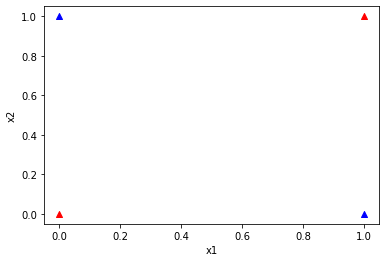

In [2]:
# data를 matplotlib를 이용해 그래프로 나타내본다

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
# 학슶킨 데이터를 dataset에 담은 후, batch size를 정한다
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# 학습에 쓰일 data의 type을 float로 casting 시켜준다.
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [4]:
# data를 3layer의 nn를 통해 학습시킨 후 모델을 생성한다

W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [6]:
# 3layer로 nn 모델을 만든다
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

# cost function
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 0.5를 기준이로 0 or 1의 값을 출력
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

# gradient tape를 이용
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [10]:
# 학습

EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.5803
Iter: 1000, Loss: 0.5728
Iter: 2000, Loss: 0.5659
Iter: 3000, Loss: 0.5596
Iter: 4000, Loss: 0.5539
Iter: 5000, Loss: 0.5486
Iter: 6000, Loss: 0.5437
Iter: 7000, Loss: 0.5391
Iter: 8000, Loss: 0.5347
Iter: 9000, Loss: 0.5303
Testset Accuracy: 0.7500


In [ ]:
# logistic regression 과는 달리 loss 값이 감소하고,
# 정확도가 증가